In [1]:
# from deepface import DeepFace
import face_recognition

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch.optim as optim


import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import os
import time

In [2]:
# img1_path = "./data/Image/7/1676.bmp"
# backends = [
#   'opencv', 
#   'ssd', 
#   'dlib', 
#   'mtcnn', 
#   'retinaface', 
#   'mediapipe'
# ]
# img1 = DeepFace.extract_faces(img1_path, detector_backend=backends[0])
# img1[0].keys()

In [3]:
# plt.imshow(img1[0]['face'])

### Face/Eye/Mouth Segmentation

#### deepface method

In [4]:
# # 0.13s
# detectors = ["opencv", "ssd", "mtcnn", "dlib", "retinaface"]

# #face recognition
# start = time.time()
# dfs = DeepFace.detectFace(img_path = "./data/Image/8/36.bmp", 
#         detector_backend=detectors[0]
# )
# print(f"take {time.time()-start} seconds to run")

# plt.imshow(dfs)

#### haarcascade method

In [2]:
test = time.time()
image = cv2.imread("./data/Image/4/11.bmp")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
print(f"np op takes {time.time() - test} sec")

test = time.time()
image = np.array(Image.open("./data/Image/8/36.bmp"))
gray_img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
print(f"img takes {time.time() - test} sec")

np op takes 0.005803585052490234 sec
img takes 0.019875764846801758 sec


1
take 0.1546926498413086 seconds to run


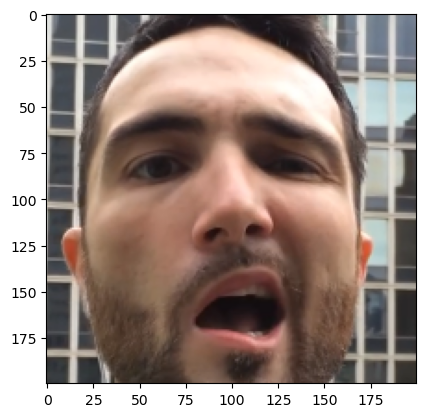

In [3]:
# 0.07 seconds
# 8/36.bmp
start = time.time()
image = cv2.imread("./data/Image2/14/1571.bmp")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
height = int(image.shape[0] / 2)
height_percent = (height / image.shape[0])
width = int((image.shape[1] * height_percent))
image = cv2.resize(image, dsize=(width, height), interpolation=cv2.INTER_LINEAR)

gray_img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)
face = face_classifier.detectMultiScale(
    gray_img, scaleFactor=1.29, minNeighbors=8
)

print(len(face))
x, y, w, h = face[0]
# for (x, y, w, h) in face:
#     cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 4)

rgb_image = image[y:y+h, x:x+w]
# res = cv2.resize(face, dsize=(128, 128), interpolation=cv2.INTER_LINEAR)
# print(face.shape)
# plt.imshow(face)

# facial_landmarks = face_recognition.face_landmarks(rgb_image)
# print(f"take {time.time()-start} seconds to run")
# print(facial_landmarks)
# print(facial_landmarks[0].keys())

# for landmarks in facial_landmarks:
#     left_eye = landmarks["left_eye"]
#     right_eye = landmarks["right_eye"]
#     left_eb = landmarks["left_eyebrow"]
#     right_eb = landmarks["left_eyebrow"]
#     top_lip = landmarks["top_lip"]
#     btm_lip = landmarks["bottom_lip"]

#     # print(len(left_eye), len(right_eye), len(top_lip), len(btm_lip))

#     left_eyes, right_eyes, top_eyes, bottom_eyes = [], [], [], []
#     left_mouth, right_mouth, top_mouth, bottom_mouth = [], [], [], []

#     for (x, y) in left_eb:
#         left_eyes.append(x-10)
#         right_eyes.append(x+10)
#         bottom_eyes.append(y+3)
#         top_eyes.append(y-3)
#     for (x, y) in right_eb:
#         left_eyes.append(x-10)
#         right_eyes.append(x+10)
#         bottom_eyes.append(y+3)
#         top_eyes.append(y-3)
#     for (x, y) in left_eye:
#         left_eyes.append(x-10)
#         right_eyes.append(x+10)
#         bottom_eyes.append(y+3)
#         top_eyes.append(y-3)
#         # cv2.rectangle(rgb_image, (x-5, y-5), (x+5, y+5), (0, 255, 0), 2)
#     for (x, y) in right_eye:
#         left_eyes.append(x-10)
#         right_eyes.append(x+10)
#         bottom_eyes.append(y+3)
#         top_eyes.append(y-3)
#     up_bound = rgb_image.shape[0]
#     left = max(0, min(left_eyes))
#     right = min(up_bound, max(right_eyes))
#     bottom = min(up_bound, max(bottom_eyes))
#     top = max(0, min(top_eyes))
#     eye_X = rgb_image[top:bottom, left:right]
#     # cv2.rectangle(rgb_image, (left, top), (right, bottom), (0, 255, 0), 2)

#     for (x, y) in top_lip:
#         left_mouth.append(x-10)
#         right_mouth.append(x+10)
#         bottom_mouth.append(y+3)
#         top_mouth.append(y-3)
#         # cv2.rectangle(rgb_image, (x-5, y-5), (x+5, y+5), (0, 0, 255), 2)
#     for (x, y) in btm_lip:
#         left_mouth.append(x-10)
#         right_mouth.append(x+10)
#         bottom_mouth.append(y+3)
#         top_mouth.append(y-3)
#     left = max(0, min(left_mouth))
#     right = min(up_bound, max(right_mouth))
#     bottom = min(up_bound, max(bottom_mouth))
#     top = max(0, min(top_mouth))
#     mouth_X = rgb_image[top:bottom, left:right]

plt.imshow(rgb_image)
print(f"take {time.time()-start} seconds to run")


(812, 1330, 3)
take 0.15288782119750977 seconds to run
[{'chin': [(-1, 43), (-1, 59), (2, 74), (4, 89), (9, 102), (17, 115), (28, 125), (41, 131), (57, 131), (72, 130), (85, 124), (94, 116), (102, 104), (106, 90), (109, 76), (112, 61), (114, 45)], 'left_eyebrow': [(7, 27), (15, 18), (27, 14), (40, 14), (51, 19)], 'right_eyebrow': [(68, 19), (79, 14), (91, 14), (102, 18), (109, 27)], 'nose_bridge': [(59, 35), (59, 46), (60, 56), (60, 67)], 'nose_tip': [(48, 76), (53, 77), (58, 79), (63, 77), (68, 75)], 'left_eye': [(19, 39), (26, 34), (35, 34), (42, 40), (34, 42), (25, 42)], 'right_eye': [(73, 40), (81, 34), (90, 34), (97, 40), (90, 43), (81, 42)], 'top_lip': [(36, 102), (42, 93), (51, 89), (56, 90), (62, 88), (69, 91), (75, 99), (71, 99), (62, 96), (56, 96), (50, 96), (40, 101)], 'bottom_lip': [(75, 99), (70, 107), (63, 112), (56, 113), (50, 113), (42, 110), (36, 102), (40, 101), (51, 102), (57, 102), (62, 101), (71, 99)]}]
dict_keys(['chin', 'left_eyebrow', 'right_eyebrow', 'nose_brid

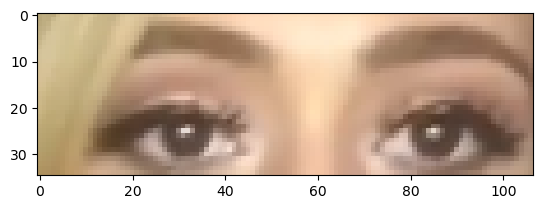

In [4]:
# face_img = img1[0]['face']
# image = cv2.imread('./data/Image/9/1791.bmp')
# rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
start = time.time()
image = cv2.imread("./data/Image/8/36.bmp")
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(rgb_image.shape)
height = int(rgb_image.shape[0] / 2)
height_percent = (height / rgb_image.shape[0])
width = int((rgb_image.shape[1] * height_percent))
rgb_image = cv2.resize(rgb_image, dsize=(width, height), interpolation=cv2.INTER_LINEAR)

# rgb_image = res

face_locations = face_recognition.face_locations(rgb_image)

left_eyes, right_eyes, top_eyes, bottom_eyes = [], [], [], []
left_mouth, right_mouth, top_mouth, bottom_mouth = [], [], [], []

for (top, right, bottom, left) in face_locations:
    # print(top)
    rgb_image = rgb_image[top:bottom, left:right]
    # cv2.rectangle(rgb_image, (left, max(top-40, 0)), (right, bottom), (255, 0, 0), 2)

facial_landmarks = face_recognition.face_landmarks(rgb_image)
print(f"take {time.time()-start} seconds to run")
print(facial_landmarks)
print(facial_landmarks[0].keys())

for landmarks in facial_landmarks:
    left_eye = landmarks["left_eye"]
    right_eye = landmarks["right_eye"]
    left_eb = landmarks["left_eyebrow"]
    right_eb = landmarks["left_eyebrow"]
    top_lip = landmarks["top_lip"]
    btm_lip = landmarks["bottom_lip"]

    print(len(left_eye), len(right_eye), len(top_lip), len(btm_lip))

    for (x, y) in left_eb:
        left_eyes.append(x-10)
        right_eyes.append(x+10)
        bottom_eyes.append(y+3)
        top_eyes.append(y-3)
    for (x, y) in right_eb:
        left_eyes.append(x-10)
        right_eyes.append(x+10)
        bottom_eyes.append(y+3)
        top_eyes.append(y-3)
    for (x, y) in left_eye:
        left_eyes.append(x-10)
        right_eyes.append(x+10)
        bottom_eyes.append(y+3)
        top_eyes.append(y-3)
        # cv2.rectangle(rgb_image, (x-5, y-5), (x+5, y+5), (0, 255, 0), 2)
    for (x, y) in right_eye:
        left_eyes.append(x-10)
        right_eyes.append(x+10)
        bottom_eyes.append(y+3)
        top_eyes.append(y-3)
    up_bound = rgb_image.shape[0]
    left = max(0, min(left_eyes))
    right = min(up_bound, max(right_eyes))
    bottom = min(up_bound, max(bottom_eyes))
    top = max(0, min(top_eyes))
    eye_X = rgb_image[top:bottom, left:right]
    # cv2.rectangle(rgb_image, (left, top), (right, bottom), (0, 255, 0), 2)

    for (x, y) in top_lip:
        left_mouth.append(x-10)
        right_mouth.append(x+10)
        bottom_mouth.append(y+3)
        top_mouth.append(y-3)
        # cv2.rectangle(rgb_image, (x-5, y-5), (x+5, y+5), (0, 0, 255), 2)
    for (x, y) in btm_lip:
        left_mouth.append(x-10)
        right_mouth.append(x+10)
        bottom_mouth.append(y+3)
        top_mouth.append(y-3)
    left = max(0, min(left_mouth))
    right = min(up_bound, max(right_mouth))
    bottom = min(up_bound, max(bottom_mouth))
    top = max(0, min(top_mouth))
    mouth_X = rgb_image[top:bottom, left:right]
    # cv2.rectangle(rgb_image, (left, top), (right, bottom), (0, 0, 255), 2)

mouth_X = cv2.resize(mouth_X, dsize=(120, 40), interpolation=cv2.INTER_LINEAR)
plt.imshow(eye_X)

In [5]:
rgb_image.shape

(129, 129, 3)

## Dataset and Datalaoder

In [5]:
class FaceDataset(Dataset):
    def __init__(self, root_dir, target_size, setOps=True, PHCNN=False, transform=None):
        super(FaceDataset, self).__init__()
        self.root_dir = root_dir
        self.target_size = target_size
        self.setOps = setOps
        self.PHCNN = PHCNN
        self.transform = transform
        self.image_dirs = [os.path.join(root_dir, "Image")] + [os.path.join(root_dir, f"Image{i}") for i in range(2, 5)]
        self.label_dir = os.path.join(root_dir, "Image_large_XML")
        self.img_links = {}
        self.mapping = {
            "normal_eyes": 0,
            "normal_mouth" : 0,
            "slightpalsy_eyes": 1,
            "strongpalsy_eyes": 2,
            "slightpalsy_mouth": 1,
            "strongpalsy_mouth": 2
        }

        if PHCNN:
            self.link_times = self.__combineFile__()
            self.segmentation_X, self.segmentation_y = self.__featureSegmentation__()
            # print(f"there are {len(self.link_times)} faces in the data")
            print(f"length of facial segmentation in total: {sum([len(f[0]) for f in self.segmentation_X])}")
        else: 
            self.X, self.y = self.__combineFile__()
            print(f"length of X: {len(self.X)}")
            print(f"length of y: {len(self.y)}")

    def __len__(self):
        if self.PHCNN: return len(self.segmentation_X)
        return len(self.X)
    
    def __getitem__(self, idx):
        if self.PHCNN: 
            face_X, eye_X, mouth_X = self.segmentation_X[idx]

            # resize and stack
            temp = [torch.tensor(cv2.resize(face, dsize=(128, 128), interpolation=cv2.INTER_LINEAR)) for face in face_X]
            if (len(temp)==0): 
                print(f"cur idx is {idx}")
                print(f"total length of data: {len(self.segmentation_X)}")
                print(eye_X)
            face_X = torch.stack(temp)
            eye_X = torch.stack([torch.tensor(cv2.resize(eye, dsize=(120, 40), interpolation=cv2.INTER_LINEAR)) for eye in eye_X])
            mouth_X = torch.stack([torch.tensor(cv2.resize(mouth, dsize=(120, 40), interpolation=cv2.INTER_LINEAR)) for mouth in mouth_X])
            # print(self.segmentation_y[idx])
            y = torch.tensor(self.segmentation_y[idx])
            # y = torch.stack([torch.tensor(sub_y) for sub_y in self.segmentation_y[idx]])

            # reshape
            face_X = face_X.permute(3, 0, 1, 2).contiguous()
            eye_X = eye_X.permute(3, 0, 1, 2).contiguous()
            mouth_X = mouth_X.permute(3, 0, 1, 2).contiguous()
            
            return face_X, eye_X, mouth_X, y
        
        if self.transform: 
            X = self.transform(self.X[idx])
            y = torch.tensor(self.y[idx])
        else: 
            X = self.X[idx]
            y = torch.tensor(self.y[idx])
            
        return X, y

    def __combineFile__(self):
        image_matrices = []
        labels = []
        image_times = []
        subdir_cnter = 1
        label_exist = os.listdir(self.label_dir)
        # print(label_exist)

        for image_dir in self.image_dirs:
            cur = 0
            while cur < 8:
                subdir_name = str(subdir_cnter)
                # print("iter: ", cur)
                # print("sub-name: ", subdir_name)
                if subdir_name in label_exist:
                    img_pth = os.path.join(image_dir, subdir_name)
                    # print(f"img_pth is {img_pth}")
                    image_files = sorted(os.listdir(img_pth), key=lambda file: int(file.split(".")[0]))
                    lab_pth = os.path.join(self.label_dir, subdir_name)
                    label_files = sorted(os.listdir(lab_pth), key=lambda file: int(file.split(".")[0]))
                    if self.setOps: # set operations
                        img_prefix = set([f.split(".")[0] for f in image_files])
                        xml_prefix = set([f.split(".")[0] for f in label_files])
                        matching_prefix = img_prefix.intersection(xml_prefix)
                        print(f"set intersection {subdir_cnter}: {len(matching_prefix)}")
                        matching_pair = [(os.path.join(image_dir,subdir_name,prefix+".bmp"), 
                                        os.path.join(self.label_dir,subdir_name,prefix+".xml")) 
                                        for prefix in matching_prefix]

                        for img, lbl in matching_pair:
                            # image process
                            # print(lbl)
                            image = Image.open(img)

                            # label process
                            with open(lbl, "r") as f: cur_label = f.read()
                            label = [o.find("name").text.lower() for o in bs(cur_label, "xml").find_all('object')]
                            if len(label) != 2: continue
                            label_processed = [self.mapping[l] for l in label]
                            # eye_label, mouth_label = [0, 0, 0], [0, 0, 0]
                            # eye_label[label_processed[0]] = 1
                            # mouth_label[label_processed[1]] = 1

                            # store link for later usage
                            image_matrices.append(image)
                            labels.append(label_processed)
                            # labels.append([eye_label, mouth_label])
                            self.img_links[img] = label_processed #[eye_label, mouth_label]
                    else: # loop operation
                        img_cnter = 0
                        file_cnter = 0

                        while img_cnter < len(image_files):
                            if file_cnter>=len(label_files): break
                            bmp_file = image_files[img_cnter]
                            img_match = int(bmp_file.split(".")[0])
                            label_match = int(label_files[file_cnter].split(".")[0])
        
                            # print(to_match, label_files[file_cnter])
                            if img_match==label_match:
                                # image process
                                image = Image.open(img)

                                # label process
                                with open(lbl, "r") as f: cur_label = f.read()
                                label = [o.find("name").text.lower() for o in bs(cur_label, "xml").find_all('object')]
                                if len(label) != 2: continue
                                label_processed = [self.mapping[l] for l in label]
                                eye_label, mouth_label = [0, 0, 0], [0, 0, 0]
                                eye_label[label_processed[0]] = 1
                                mouth_label[label_processed[1]] = 1

                                image_matrices.append(image)
                                labels.append([eye_label, mouth_label])
                                self.img_links[img] = [eye_label, mouth_label]

                                img_cnter += 1
                                file_cnter += 1
                            elif img_match>label_match: file_cnter += 1
                            else: img_cnter += 1
                        print(f"for loop {subdir_cnter}: done")

                    # clear previous list and restart
                    if self.PHCNN:
                        if len(self.img_links): image_times.append(self.img_links)
                        self.img_links = {}

                subdir_cnter += 1
                cur += 1
        
        if self.PHCNN: return image_times
        else: return image_matrices, labels
    
    def __featureSegmentation__(
            self, scaleFactor=1.29, minNeighbors=8, 
            shrink_factor=2, padding=10):
        segmentation_X, segmentation_y = [], []
        face_classifier = cv2.CascadeClassifier(
            cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
        )
        total = sum([len(faces) for faces in self.link_times])
        print(f"Segmentation begins, there are {total} images")
        for faces in self.link_times:
            # sort faces by their key value
            for k in faces:
                cur_k = k
                break
            # print(f"there are {len(faces)} images", end=", ")
            # print(cur_k)
            print(f"Image {cur_k.split('/')[3]} folder begin to segment...")
            start = time.time()
            face_sequence = sorted(faces.keys(), 
                                   key=lambda x: int(x.split("/")[-1].split(".")[0]))
            cur_face_X, cur_eye_X, cur_mouth_X = [], [], []
            cur_face_y = []
            for img_link in face_sequence:
                img = cv2.imread(img_link)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                # resize the imaage so that the run time is faster
                height = int(img.shape[0] / shrink_factor)
                height_percent = (height / img.shape[0])
                width = int((img.shape[1] * height_percent))
                img = cv2.resize(img, dsize=(width, height), interpolation=cv2.INTER_LINEAR)

                # segment face
                gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
                face = face_classifier.detectMultiScale(
                    gray_img, scaleFactor=scaleFactor, minNeighbors=minNeighbors
                )

                if len(face) != 1: 
                    print(f"\t    skipping {img_link} because != 1 face recognized. Face detected: {len(face)}")
                    continue
                x, y, w, h = face[0]
                face_X = img[y:y+h, x:x+w]

                
                left_eyes, right_eyes, top_eyes, bottom_eyes = [], [], [], []
                left_mouth, right_mouth, top_mouth, bottom_mouth = [], [], [], []

                # segment eyes and mouth
                facial_landmarks = face_recognition.face_landmarks(face_X)
                if len(facial_landmarks) != 1: 
                    print(f"\t    skipping {img_link} because != 1 facial feature detected. Feature detected: {len(facial_landmarks)}")
                    # plt.imshow(face_X)
                    continue

                hpadding = padding // 3 # ensure 40x120 dimension percentage
                for landmarks in facial_landmarks:
                    left_eye = landmarks["left_eye"]
                    right_eye = landmarks["right_eye"]
                    left_eb = landmarks["left_eyebrow"]
                    right_eb = landmarks["left_eyebrow"]
                    top_lip = landmarks["top_lip"]
                    btm_lip = landmarks["bottom_lip"]

                    # eyes
                    for (x, y) in left_eb:
                        left_eyes.append(x-padding)
                        right_eyes.append(x+padding)
                        bottom_eyes.append(y+hpadding)
                        top_eyes.append(y-hpadding)
                    for (x, y) in right_eb:
                        left_eyes.append(x-padding)
                        right_eyes.append(x+padding)
                        bottom_eyes.append(y+hpadding)
                        top_eyes.append(y-hpadding)
                    for (x, y) in left_eye:
                        left_eyes.append(x-padding)
                        right_eyes.append(x+padding)
                        bottom_eyes.append(y+hpadding)
                        top_eyes.append(y-hpadding)
                        # cv2.rectangle(rgb_image, (x-5, y-5), (x+5, y+5), (0, 255, 0), 2)
                    for (x, y) in right_eye:
                        left_eyes.append(x-padding)
                        right_eyes.append(x+padding)
                        bottom_eyes.append(y+hpadding)
                        top_eyes.append(y-hpadding)

                    up_bound = face_X.shape[0]
                    left = max(0, min(left_eyes))
                    right = min(up_bound, max(right_eyes))
                    bottom = min(up_bound, max(bottom_eyes))
                    top = max(0, min(top_eyes))
                    eye_X = face_X[top:bottom, left:right]

                    # mouth
                    for (x, y) in top_lip:
                        left_mouth.append(x-padding)
                        right_mouth.append(x+padding)
                        bottom_mouth.append(y+hpadding)
                        top_mouth.append(y-hpadding)
                        # cv2.rectangle(rgb_image, (x-5, y-5), (x+5, y+5), (0, 0, 255), 2)
                    for (x, y) in btm_lip:
                        left_mouth.append(x-padding)
                        right_mouth.append(x+padding)
                        bottom_mouth.append(y+hpadding)
                        top_mouth.append(y-hpadding)

                    left = max(0, min(left_mouth))
                    right = min(up_bound, max(right_mouth))
                    bottom = min(up_bound, max(bottom_mouth))
                    top = max(0, min(top_mouth))
                    mouth_X = face_X[top:bottom, left:right]

                cur_face_X.append(face_X)
                cur_eye_X.append(eye_X)
                cur_mouth_X.append(mouth_X)
                cur_face_y.append(faces[img_link])
                # if len(cur_face_X)==0:
                #     print(f"\tbatch {batch_seq} has some problem")

                if len(cur_face_X) == 4:
                    segmentation_X.append([cur_face_X, cur_eye_X, cur_mouth_X])
                    segmentation_y.append(cur_face_y)
                    cur_face_X, cur_eye_X, cur_mouth_X = [], [], []
                    cur_face_y = []

            print(f"\tFinish Image {cur_k.split('/')[3]} in {time.time()-start} sec...")
            # print(segmentation_y)
            # if int(cur_k.split('/')[3]) > 1:
            #     break

            # segmentation_X.append([cur_face_X, cur_eye_X, cur_mouth_X])
            # segmentation_y.append(cur_face_y)
        
        return segmentation_X, segmentation_y

In [6]:
# 16972 originally
# 16963 after edge cases removal
# 16317 for segmentation - scaleFactor: 1.29
# 16284 for segmentation - scaleFactor: 1.3
target_size = (224, 224)
transform = transforms.Compose([
    transforms.Resize(target_size),
    transforms.ToTensor(),
])
dataset = FaceDataset("./data", target_size, setOps=True, PHCNN=True, transform=transform)

set intersection 1: 1054
set intersection 2: 473
set intersection 3: 193
set intersection 4: 283
set intersection 5: 397
set intersection 8: 2066
set intersection 9: 1594
set intersection 10: 156
set intersection 11: 735
set intersection 12: 1
set intersection 13: 1050
set intersection 14: 687
set intersection 15: 420
set intersection 16: 238
set intersection 17: 309
set intersection 22: 245
set intersection 23: 280
set intersection 26: 277
set intersection 27: 1507
set intersection 28: 2296
set intersection 29: 1376
set intersection 30: 1208
set intersection 31: 127
Segmentation begins, there are 16963 images
Image 1 folder begin to segment...
	Finish Image 1 in 27.49981999397278 sec...
Image 2 folder begin to segment...
	    skipping ./data/Image/2/736.bmp because != 1 facial feature detected. Feature detected: 0
	    skipping ./data/Image/2/746.bmp because != 1 facial feature detected. Feature detected: 0
	    skipping ./data/Image/2/856.bmp because != 1 facial feature detected. Fea

In [7]:
train_size = int(0.9 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])
len(train_dataset), len(test_dataset)

(3665, 408)

In [8]:
num_iter = 0
for face_X, eye_X, mouth_X, y in train_dataset:
    if num_iter > 0: break
    print(face_X.size())
    print(eye_X.size())
    print(type(mouth_X))
    print(y.size())
    num_iter += 1


torch.Size([3, 4, 128, 128])
torch.Size([3, 4, 40, 120])
<class 'torch.Tensor'>
torch.Size([4, 2])


In [9]:
batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, drop_last=True)

In [10]:
len(train_loader)

458

In [11]:
num_iter = 0
for face_X, eye_X, mouth_X, y in train_loader:
    if num_iter > 0: break
    print(face_X.size())
    print(eye_X.size())
    print(type(mouth_X))
    print(y.size())
    num_iter += 1

torch.Size([8, 3, 4, 128, 128])
torch.Size([8, 3, 4, 40, 120])
<class 'torch.Tensor'>
torch.Size([8, 4, 2])


In [12]:
y.size()

torch.Size([8, 4, 2])

In [13]:
y[1]

tensor([[1, 1],
        [1, 1],
        [1, 1],
        [1, 1]])

In [14]:
idx2eye = {0: "normal_eyes", 1:"slightpalsy_eyes", 2:"strongpalsy_eyes"}
idx2mouth = {0: "normal_mouth", 1:"slightpalsy_mouth", 2:"strongpalsy_mouth"}
combinations, counts = torch.unique(y[1], dim=0, return_counts=True)
combinations[torch.argmax(counts)].tolist()

[1, 1]

In [15]:
palsy_oh = {
    "normal_eyesnormal_eyes":0,
    "normal_eyesslightpalsy_eyes":1,
    "normal_eyesstrongpalsy_eyes":2,
    "slightpalsy_eyesnormal_eyes":3,
    "slightpalsy_eyesslightpalsy_eyes":4,
    "slightpalsy_eyesstrongpalsy_eyes":5,
    "strongpalsy_eyesnormal_eyes":6,
    "strongpalsy_eyesslightpalsy_eyes":7,
    "strongpalsy_eyesstrongpalsy_eyes":8
}
y_raw = [1, 1]
out = [0] * 9
y_raw[0] = idx2eye[y_raw[0]]
y_raw[1] = idx2eye[y_raw[1]]
out[palsy_oh["".join(y_raw)]] = 1

torch.tensor(out)

tensor([0, 0, 0, 0, 1, 0, 0, 0, 0])

In [16]:
face_X.shape

torch.Size([8, 3, 4, 128, 128])

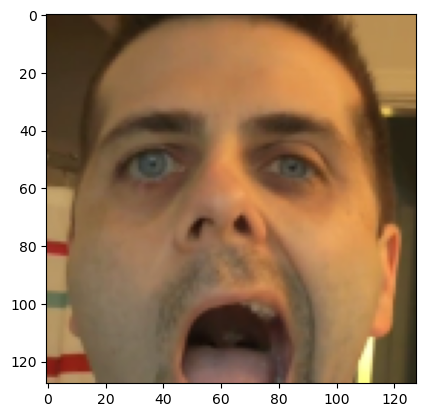

In [17]:
plt.imshow(face_X[0].permute(1,2,3,0)[0])

In [55]:
class PHCNN(nn.Module):
    def __init__(self, hidden_lstm, num_layer_lstm, out_dim, device):
        super(PHCNN, self).__init__()
        self.hidden_size = hidden_lstm
        self.num_layer = num_layer_lstm
        self.device = device
        self.idx2eye = {0: "normal_eyes", 1:"slightpalsy_eyes", 2:"strongpalsy_eyes"}
        self.idx2mouth = {0: "normal_mouth", 1:"slightpalsy_mouth", 2:"strongpalsy_mouth"}
        self.palsy2score = {
            "normal_eyesnormal_eyes":0,
            "normal_eyesslightpalsy_eyes":1,
            "normal_eyesstrongpalsy_eyes":2,
            "slightpalsy_eyesnormal_eyes":3,
            "slightpalsy_eyesslightpalsy_eyes":4,
            "slightpalsy_eyesstrongpalsy_eyes":5,
            "strongpalsy_eyesnormal_eyes":6,
            "strongpalsy_eyesslightpalsy_eyes":7,
            "strongpalsy_eyesstrongpalsy_eyes":8
        }

        self.globalConv = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(inplace=True),
            nn.Conv2d(16, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.globalFc = nn.Sequential(
            nn.Linear(16384, 1024),
            nn.Dropout(0.5)
        )
        self.regionalConv1 = nn.Sequential(
            nn.Conv2d(3, 8, kernel_size=3, padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU(inplace=True),
            nn.Conv2d(8, 8, kernel_size=3, padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.regionalFc1 = nn.Sequential(
            nn.Linear(9600, 1024),
            nn.Dropout(0.5)
        )
        self.regionalConv2 = nn.Sequential(
            nn.Conv2d(8, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.regionalFc2 = nn.Sequential(
            nn.Linear(9600, 1024),
            nn.Dropout(0.5)
        )
        self.regionalConv3 = nn.Sequential(
            nn.Conv2d(32, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.regionalFc3 = nn.Sequential(
            nn.Linear(9600, 1024),
            nn.Dropout(0.5)
        )
        self.lstm = nn.LSTM(1024, hidden_lstm, num_layer_lstm, batch_first=True)
        self.severity_grading = nn.Linear(hidden_lstm, out_dim)
        self.activation = nn.Softmax(dim=1)

    def forward(self, face_X, eye_X, mouth_X):
        # face feature extraction
        # print(face_X.size())
        embed_seq = []
        hidden = None
        for t in range(face_X.size(2)):
            face_pred = self.globalConv(face_X[:,:,t,:,:])
            face_pred = face_pred.view(face_pred.size(0), -1)
            face_pred = self.globalFc(face_pred)

            # eye feature1 extraction
            eye_layer1 = self.regionalConv1(eye_X[:,:,t,:,:])
            eye_feature1 = eye_layer1.view(eye_layer1.size(0), -1)
            eye_feature1 = self.regionalFc1(eye_feature1)

            # eye feature2 extraction
            eye_layer2 = self.regionalConv2(eye_layer1)
            eye_feature2 = eye_layer2.view(eye_layer2.size(0), -1)
            eye_feature2 = self.regionalFc2(eye_feature2)

            # eye feature3 extraction
            eye_layer3 = self.regionalConv3(eye_layer2)
            eye_feature3 = eye_layer3.view(eye_layer3.size(0), -1)
            eye_feature3 = self.regionalFc3(eye_feature3)

            eye_pred = eye_feature1 + eye_feature2 + eye_feature3

            # mouth feature1 extraction
            mouth_layer1 = self.regionalConv1(mouth_X[:,:,t,:,:])
            mouth_feature1 = mouth_layer1.view(mouth_layer1.size(0), -1)
            mouth_feature1 = self.regionalFc1(mouth_feature1)

            # mouth feature2 extraction
            mouth_layer2 = self.regionalConv2(mouth_layer1)
            mouth_feature2 = mouth_layer2.view(mouth_layer2.size(0), -1)
            mouth_feature2 = self.regionalFc2(mouth_feature2)

            # mouth feature3 extraction
            mouth_layer3 = self.regionalConv3(mouth_layer2)
            mouth_feature3 = mouth_layer3.view(mouth_layer3.size(0), -1)
            mouth_feature3 = self.regionalFc3(mouth_feature3)

            mouth_pred = mouth_feature1 + mouth_feature2 + mouth_feature3

            # fuse the feature vectors and unsqueeze
            fuse = face_pred + eye_pred + mouth_pred
            # print(f"fuse shape: {fuse.size()}")
            # x, hidden = self.lstm(fuse, hidden)
            embed_seq.append(fuse)

        # out = self.severity_grading(x)
        # out = self.activation(out)

        embed_seq = torch.stack(embed_seq, dim=0)
        embed_seq = embed_seq.transpose(0, 1)

        # pass to lstm
        # h0 = torch.zeros(self.num_layer, embed_seq.size(0), self.hidden_size).to(self.device)
        # c0 = torch.zeros(self.num_layer, embed_seq.size(0), self.hidden_size).to(self.device)
        out, hidden = self.lstm(embed_seq, hidden)
        out = self.severity_grading(out[:, -1, :])#.flatten()
        out = self.activation(out)
        # print(out.size(), h.size(), c.size())

        return out
    
    def transform_y(self, y):
        out = []
        for batch_y in y:
            combinations, counts = torch.unique(batch_y, dim=0, return_counts=True)
            video_label = combinations[torch.argmax(counts)].tolist()

            new_label = [0] * 9
            video_label[0] = self.idx2eye[video_label[0]]
            video_label[1] = self.idx2eye[video_label[1]]
            new_label[self.palsy2score["".join(video_label)]] = 1
            out.append(new_label)

        return torch.tensor(out)
    
    def acc(self, pred, label):
        pred_idx = torch.argmax(pred, dim=1)
        label_idx = torch.argmax(label, dim=1)
        return sum(pred_idx==label_idx).item()/pred_idx.size()[0]

In [56]:
net = PHCNN(64, 3, 9, "cpu")
face = torch.randn(8, 3, 4, 128, 128)
eye = torch.randn(8, 3, 4, 40, 120)
mouth = torch.randn(8, 3, 4, 40, 120)
fuse = net(face, eye, mouth)
# fuse = face_pred + eye_pred + mouth_pred
# face_pred[5,10:12], eye_pred[5,10:12], mouth_pred[5,10:12], fuse[5,10:12]

fuse.shape


torch.Size([8, 9])

In [57]:
weight_dict = {}
for face_X, eye_X, mouth_X, y in train_loader:
    # print(1)
    cur_vals = torch.argmax(net.transform_y(y), dim=1)
    for idx in cur_vals:
        idx = idx.item()
        if idx not in weight_dict:
            weight_dict[idx] = 1
        else: weight_dict[idx] += 1

print(weight_dict)
most_occ = max([v for k, v in weight_dict.items()])

weights = [0] * 9
for k in weight_dict:
    weights[k] = most_occ/weight_dict[k]

weights = torch.FloatTensor(weights)
weights

{1: 772, 4: 2358, 0: 321, 5: 91, 3: 59, 7: 32, 6: 23, 8: 6, 2: 2}


tensor([7.3458e+00, 3.0544e+00, 1.1790e+03, 3.9966e+01, 1.0000e+00, 2.5912e+01,
        1.0252e+02, 7.3688e+01, 3.9300e+02])

## Model Training & Validating

In [58]:
def train_model(model, train_data, test_data, weights, num_epochs, lr, device):
    model = model.to(device)
    optimizer = optim.SGD(model.parameters(), lr=lr)
    # criterion = nn.CrossEntropyLoss()
    criterion = nn.CrossEntropyLoss(weight=weights)
    out_train_acc, out_val_acc = [], []

    for epoch in range(num_epochs):
        train_losses, val_losses = 0.0, 0.0
        train_accs, val_accs = 0.0, 0.0
        model.train()
        print(f"Epoch {epoch+1} begins:", end="")
        cur_batch = 1
        batch_size = len(train_data) // 5

        for face_X, eye_X, mouth_X, y in train_data:
            optimizer.zero_grad() # zero grad

            face_X = face_X.float().to(device)
            eye_X = eye_X.float().to(device)
            mouth_X = mouth_X.float().to(device)
            
            pred = model(face_X, eye_X, mouth_X)
            label = model.transform_y(y).float().to(device)
            # print(f"pred type: {pred.device.type}")
            # print(f"label type: {label.device.type}")
            # print(f"\tpred: {pred}\n\t\tground truth: {label}")
            loss = criterion(pred, label) # compute loss
            acc = model.acc(pred, label)

            loss.backward() # backpropagate
            optimizer.step() # optimization
            train_losses += loss.item()
            train_accs += acc
            # print("-", end="")

            cur_batch += 1

            if (cur_batch % batch_size == 0):
                model.eval()
                val_losses = 0.0
                val_accs = 0.0
                with torch.no_grad():
                    for face_X, eye_X, mouth_X, y in test_data:
                        face_X = face_X.float().to(device)
                        eye_X = eye_X.float().to(device)
                        mouth_X = mouth_X.float().to(device)
                        
                        pred = model(face_X, eye_X, mouth_X)
                        label = model.transform_y(y).float().to(device)
                        loss = criterion(pred, label)
                        acc = model.acc(pred, label)
                        val_losses += loss.item()
                        val_accs += acc

                    print(f"\n\tBatch {cur_batch}\tTraining Loss: {train_losses/batch_size:.3f}\tValidation Loss: {val_losses/len(test_data):.3f}")
                    print(f"\t\t\tTraining Acc: {train_accs/batch_size*100:.3f}%\tValidation Acc: {val_accs/len(test_data)*100:.3f}%", end="")
                    out_train_acc.append(train_accs/batch_size)
                    out_val_acc.append(val_accs/len(test_data))
                
                train_losses = 0
                train_accs = 0
                model.train()
        print()

    return out_train_acc, out_val_acc

In [59]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = "cpu"
device

device(type='cuda')

In [73]:
loss_weight = weights.to(device) #None ; weights.to(device)
net = PHCNN(512, 2, 9, device)
train_acc, val_acc = train_model(net, train_loader, test_loader, loss_weight, 30, 0.0005, device)

Epoch 1 begins:
	Batch 91	Training Loss: 13.434	Validation Loss: 18.589
			Training Acc: 7.830%	Validation Acc: 11.765%
	Batch 182	Training Loss: 14.535	Validation Loss: 18.590
			Training Acc: 6.044%	Validation Acc: 13.480%
	Batch 273	Training Loss: 9.097	Validation Loss: 18.605
			Training Acc: 16.896%	Validation Acc: 24.020%
	Batch 364	Training Loss: 13.864	Validation Loss: 18.536
			Training Acc: 26.923%	Validation Acc: 44.853%
	Batch 455	Training Loss: 12.789	Validation Loss: 18.469
			Training Acc: 38.187%	Validation Acc: 34.804%
Epoch 2 begins:
	Batch 91	Training Loss: 9.355	Validation Loss: 18.494
			Training Acc: 38.187%	Validation Acc: 34.314%
	Batch 182	Training Loss: 13.297	Validation Loss: 18.454
			Training Acc: 28.434%	Validation Acc: 49.755%
	Batch 273	Training Loss: 9.334	Validation Loss: 18.444
			Training Acc: 42.720%	Validation Acc: 48.284%
	Batch 364	Training Loss: 21.165	Validation Loss: 18.383
			Training Acc: 31.044%	Validation Acc: 24.020%
	Batch 455	Training L

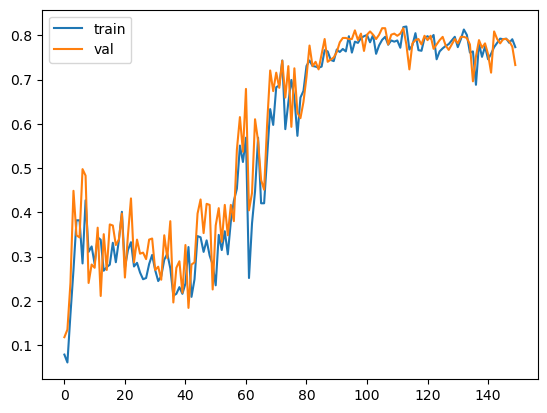

In [74]:
plt.plot(train_acc, label="train")
plt.plot(val_acc, label="val")
plt.legend()
plt.show()

In [77]:
num_iter = 13
for face_X, eye_X, mouth_X, y in test_loader:
    face_X = face_X.float().to(device)
    eye_X = eye_X.float().to(device)
    mouth_X = mouth_X.float().to(device)
    label = net.transform_y(y).float().to(device)
    with torch.no_grad():
        pred = net(face_X, eye_X, mouth_X)
    if num_iter == 13: break

In [78]:
qw = torch.argmax(pred, dim=1)
er = torch.argmax(label, dim=1)

sum(qw==er).item()/qw.size()[0] * 100

87.5